In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target.shape

(178,)

In [5]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
Xtrain.shape
Xtest.shape

(124, 13)

(54, 13)

In [110]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
# clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9444444444444444

In [58]:
clf.random_state

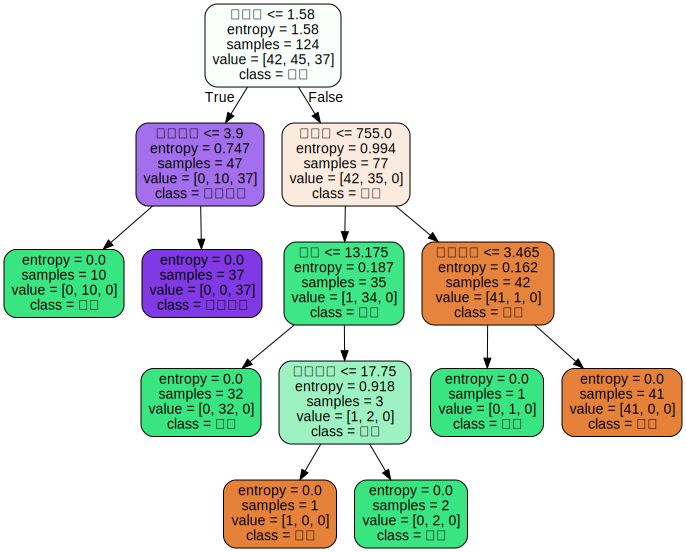

In [10]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(clf
#                                ,out_file=None
                               ,feature_names = feature_name
                               ,class_names = ['琴酒','雪莉','贝尔摩德']
                               ,filled=True
                               ,rounded = True)
graph = graphviz.Source(dot_data)
graph

In [11]:
clf.feature_importances_

array([0.01937275, 0.        , 0.        , 0.01405843, 0.        ,
       0.        , 0.43030703, 0.        , 0.        , 0.21389239,
       0.        , 0.        , 0.3223694 ])

In [12]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.019372751862543336),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.014058428531111063),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.43030703167195655),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.21389239065526866),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3223693972791204)]

In [121]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score


0.9259259259259259

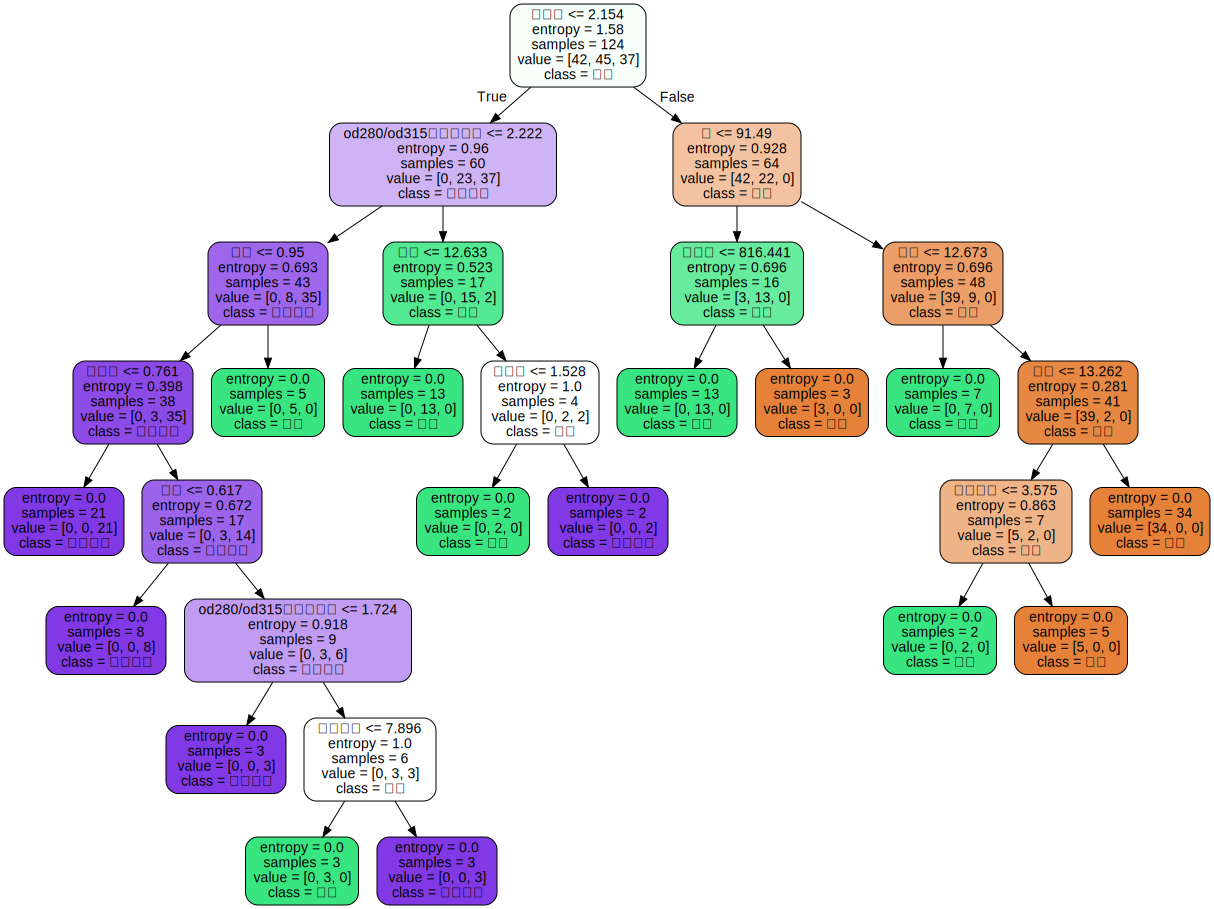

In [14]:
import graphviz
dot_data = tree.export_graphviz(clf
                                    ,feature_names= feature_name
                                    ,class_names=["琴酒","雪莉","贝尔摩德"]
                                    ,filled=True
                                    ,rounded=True
)
graph = graphviz.Source(dot_data)
graph

In [122]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

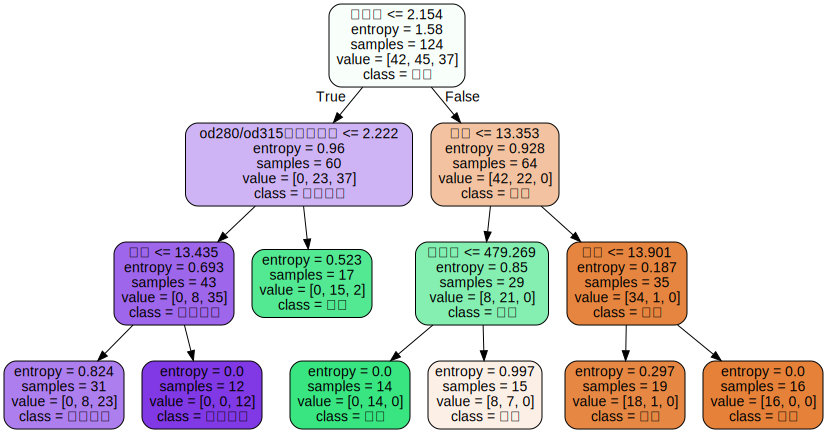

In [16]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3
                                    ,min_samples_leaf=10
#                                     ,min_samples_split=10
)
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                                    ,feature_names= feature_name
                                    ,class_names=["琴酒","雪莉","贝尔摩德"]
                                    ,filled=True
                                    ,rounded=True
)
graph = graphviz.Source(dot_data)
graph

In [17]:
score = clf.score(Xtest, Ytest)
score

0.9074074074074074

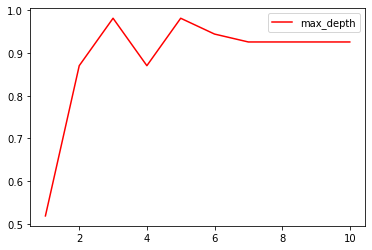

In [18]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                        ,criterion="entropy"
                                        ,random_state=30
                                        ,splitter="random"
                                        )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [20]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [163]:
# regressor = DecisionTreeRegressor(random_state=0)
regressor = DecisionTreeRegressor()
cross_val_score(regressor, boston.data, boston.target, cv=10,
                scoring = "neg_mean_squared_error"
               )

array([-15.47235294, -10.18627451, -17.1045098 , -58.38784314,
       -15.25509804, -34.76196078, -11.9174    , -91.8718    ,
       -60.778     , -38.022     ])

In [22]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [23]:
rng = np.random.RandomState(1)
rng.rand(10)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01])

In [166]:
X = np.sort(5 * rng.rand(80,1), axis=0)
X[:10]

array([[0.11165214],
       [0.13109284],
       [0.13803006],
       [0.15199845],
       [0.1728561 ],
       [0.28464719],
       [0.49371701],
       [0.5098363 ],
       [0.67713952],
       [0.71502914]])

array([ 0.09131401,  0.09668352,  0.13651039,  0.19403525,  0.24717848,
        0.26365828,  0.41252216,  0.47215529,  0.48963592,  0.49351799,
        0.60530013,  0.63450933,  0.64144608,  0.64569622,  0.66957978,
        0.73574834,  0.75072053,  0.8363043 ,  0.8532893 ,  0.87144496,
        0.97060533,  0.97564433,  0.98582462,  0.99131122,  0.99472837,
        0.99999325,  0.999977  ,  0.98591565,  0.98495285,  0.91406986,
        0.87783001,  0.8775346 ,  0.86993408,  0.86523559,  0.86040024,
        0.8420846 ,  0.78464608,  0.63168655,  0.53722799,  0.45801971,
        0.44583835,  0.34115328,  0.26769953,  0.20730318,  0.19383027,
        0.033108  ,  0.02322953, -0.17471355, -0.17645185, -0.20918837,
       -0.24990778, -0.28068224, -0.28682601, -0.31247075, -0.31458595,
       -0.32442911, -0.34965155, -0.46921115, -0.56401144, -0.57215326,
       -0.57488849, -0.57542157, -0.72069477, -0.75923066, -0.78043659,
       -0.85808859, -0.94589863, -0.94866709, -0.94870673, -0.95

<Figure size 432x288 with 0 Axes>

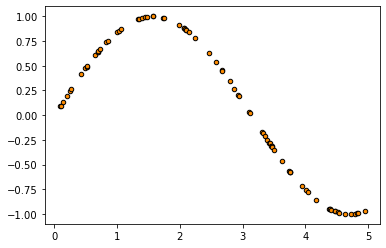

In [25]:
y = np.sin(X).ravel()
y
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

array([ 0.09131401,  0.26365828,  0.60530013,  0.73574834,  0.97060533,
        0.99999325,  0.87783001,  0.8420846 ,  0.44583835,  0.033108  ,
       -0.24990778, -0.32442911, -0.57488849, -0.85808859, -0.97149093,
       -0.99994398])

array([0.11474597, 0.94948926, 0.44991213, 0.57838961, 0.4081368 ,
       0.23702698, 0.90337952, 0.57367949, 0.00287033, 0.61714491,
       0.3266449 , 0.5270581 , 0.8859421 , 0.35726976, 0.90853515,
       0.62336012])

array([ 0.48417876, -0.42943723, -0.19089692, -0.49732285,  0.32765949,
        0.36286425, -0.43259546, -0.19681816,  0.43399983, -0.25546305,
       -0.25387619, -0.42302454, -0.21152476,  0.37572904,  0.48011987,
        0.47378901])

array([ 1.41508054,  0.7613668 , -1.08008385, -0.11649319, -0.15846594,
       -1.02609268,  1.12748005,  0.66244896, -0.25727781, -1.40878724,
       -0.18309066,  1.44405813, -0.90189802,  0.80107718, -0.92131559,
        0.33641807])

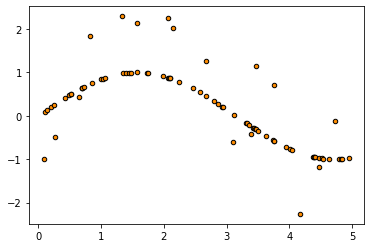

In [26]:
# 为y添加噪声
y[::5]# 5为步长
rng.rand(16) #80/5=16
0.5 - rng.rand(16)
3 * (0.5 - rng.rand(16))
y[::5] += 3 * (0.5 - rng.rand(16))
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

#np.random.rand(数组结构)，生成随机数组的函数
#了解降维函数ravel()的用法
np.random.random((2,1))
np.random.random((2,1)).ravel()
np.random.random((2,1)).ravel().shape

array([[0.62104735],
       [0.9403096 ]])

array([0.00829546, 0.99813593])

(2,)

In [28]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=2)

DecisionTreeRegressor(max_depth=5)

In [29]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]# 一维数据变二维数据，增加列维度，n*1
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
#np.arrange(开始点，结束点，步长) 生成有序数组的函数
#了解增维切片np.newaxis的用法
l = np.array([1,2,3,4])
l
l.shape
l[:,np.newaxis]# 一维数据变二维数据，增加列维度，n*1
l[:,np.newaxis].shape
l[np.newaxis,:]# 一维数据变二维数据，增加行维度，1*n
l[np.newaxis,:].shape

array([1, 2, 3, 4])

(4,)

array([[1],
       [2],
       [3],
       [4]])

(4, 1)

array([[1, 2, 3, 4]])

(1, 4)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'data')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 'Decision Tree Regression')

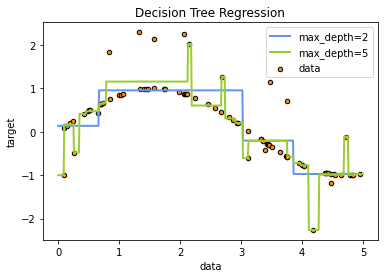

In [30]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()